# Coordinate Geometry - Plotting lines and Planes

This is the part relating to some exercises on the coordinate geometry during the tutorial on 14.11.25 to help you practice plotting lines and planes in 3D. 

First import the relevant libraries! The position is generally on top of the script.

In [46]:
# Imports (run this cell once)
import importlib       
importlib.import_module('ipympl')
importlib.import_module('ipywidgets') # essential for interactive plots
import matplotlib as mpl

%matplotlib widget
import matplotlib.pyplot as plt # essential plotting library
import numpy as np # essential numerical library
from mpl_toolkits.mplot3d import Axes3D # essential 3d plotting library

## Ex 1: Plotting lines
Line 1: x(s) = (3, 1, 0) + (1, 1, -1)s
Line 2: x(t) = (0,0,2) + (2, 1, 0)t

a) Determine if the lines intersect.

b) If they do not intersect, are they skew or parallel?

(-20.0, 20.0)

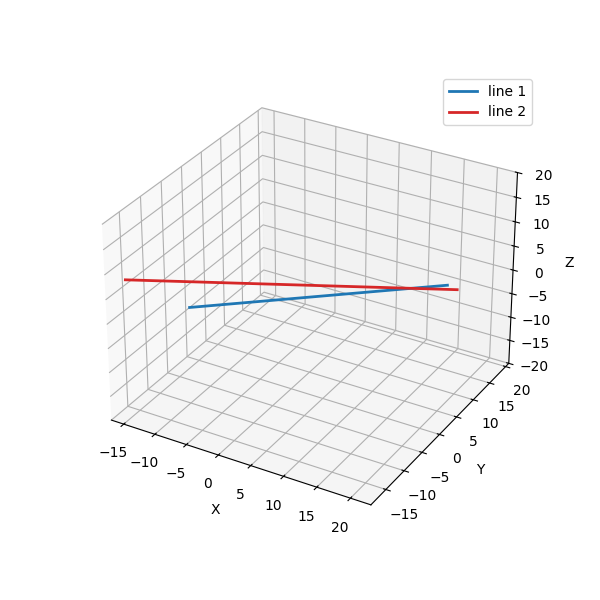

In [47]:
# make inreactive plots appear in the notebook
%matplotlib widget 

# Define the parameter ranges
t = np.linspace(-10, 10, 100)
s = np.linspace(-10, 10, 100)


# Define the parametric lines equation
l1 = np.array([[3],[1],[0]]) + np.array([[2],[0],[1]])*t
l2 = np.array([[0],[0],[2]]) + np.array([[2],[1],[0]])*t

# Initiate figure
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d') #  construct a 3D Axes
x, y, z = l1 # map line 1 coordinates
x1, y1, z1 = l2 # map line 2 coordinates
ax.plot(x, y, z, color='C0', lw=2, label='line 1')
ax.plot(x1, y1, z1, color='C3', lw=2, label='line 2')

# configure plot legends and labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.grid(True)

# Make axes aspect ratio equal (optional)
max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0 # specify range
mid_x, mid_y, mid_z = (x.max()+x.min())*0.5, (y.max()+y.min())*0.5, (z.max()+z.min())*0.5 # center around midpoints
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

## Ex 2: plotting a plane; and a line-plane intersection
P(1,0,0), Q(0, 2,0), R(0,0,3) form a plane E.

a) x(t) = (3,-1, 0) + (1, 0, 1)t. Does this line interest E? 

(-30.0, 30.0)

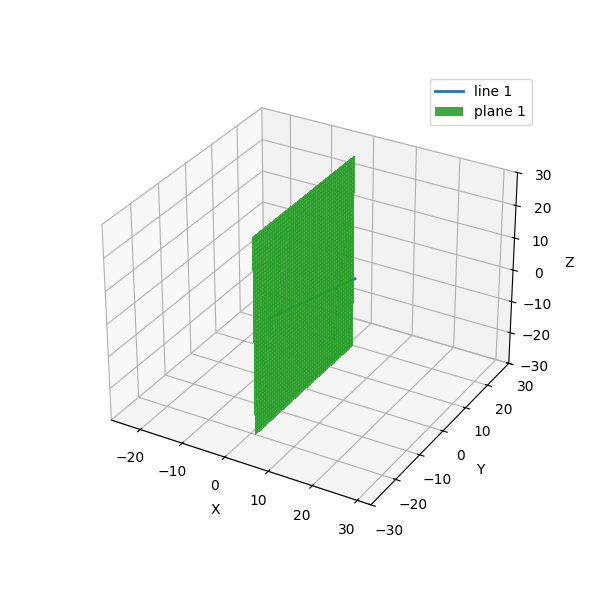

In [48]:
%matplotlib widget 
# Define the parametric line equation

l1 = np.array([[3],[-1],[0]]) + np.array([[1],[0],[1]])*t

# Create a meshgrid for the plane
T, S = np.meshgrid(t, s)                       # create 2‑D parameter grids in shape (100,100)
P = np.array([[1],[0],[0]]).reshape(3,1,1)                    # column vectors reshaped to (3,1,1)
U = np.array([[0],[2],[0]]).reshape(3,1,1)                    # (3,1,1)
V = np.array([[0],[0],[3]]).reshape(3,1,1)                    # (3,1,1)


# compute plane points (with broadcasting to (3,100,100)) 
PX = P + U * T[None, ...] + V * S[None, ...]  # shape (3,100,100) he first index selects x/y/z and the other two indexes iterate the parameter grid.
X, Y, Z = PX[0], PX[1], PX[2]                 # extracts three arrays, each (100,100)
x, y, z = l1

# Initiate the figure
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='C0', lw=2, label='line 1')
ax.plot_surface(X, Y, Z, alpha=0.9, color = "C2", shade=False, 
                antialiased=False, linewidth=0, label='plane 1') # set color to uniform color as opaque as possible

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.grid(True)

# Make axes aspect ratio equal (optional)
xs = np.hstack((x.ravel(), X.ravel()))
ys = np.hstack((y.ravel(), Y.ravel()))
zs = np.hstack((z.ravel(), Z.ravel()))

max_range = np.array([xs.max()-xs.min(), ys.max()-ys.min(), zs.max()-zs.min()]).max() / 2.0
mid_x, mid_y, mid_z = (xs.max()+xs.min())*0.5, (ys.max()+ys.min())*0.5, (zs.max()+zs.min())*0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

## Exercise 3: two lines
L1: x(s) = (1, 0, 1) + (2, -1, 3)*s

L2 x(t) = (1, 4, 7) + (2, 4, -1)*t

Are the lines, prallel, skew or intersecting?

(-29.0, 31.0)

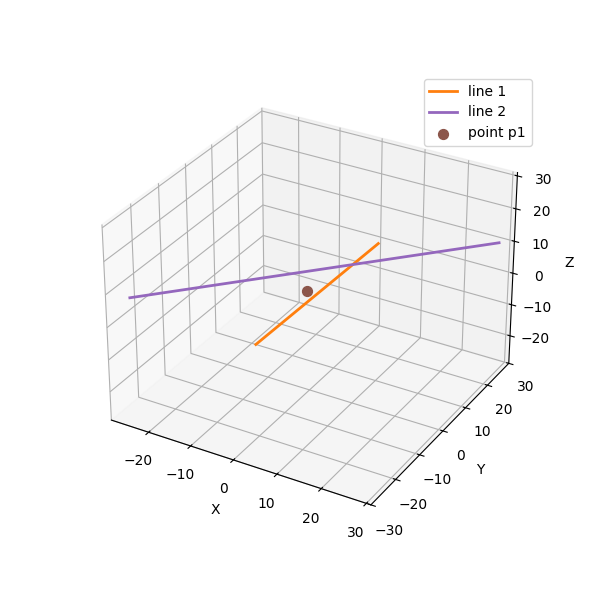

In [49]:
%matplotlib widget
# Define the parametric lines equation

l1 = np.array([[1],[0],[1]]) + np.array([[2],[-1],[3]])*t
l2 = np.array([[1],[4],[7]]) + np.array([[2],[4],[-1]])*t
p1 = np.array([[0],[-1],[3]]) # point to highlight


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d') # creates a single subplot on the Figure and returns an Axes instance configured for 3D drawing

x, y, z = l1
x1, y1, z1 = l2
x2, y2, z2 = p1 # map the point coordinates
ax.plot(x, y, z, color='C1', lw=2, label='line 1')
ax.plot(x1, y1, z1, color='C4', lw=2, label='line 2')
ax.scatter(x2, y2, z2, color='C5', s=50, label='point p1') # use scatter to plot a point

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.grid(True)

# Make axes aspect ratio equal (optional)
max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0
mid_x, mid_y, mid_z = (x.max()+x.min())*0.5, (y.max()+y.min())*0.5, (z.max()+z.min())*0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

## Exercises on calculating cross and dot product; finding the angle between two vectors. 

### Exercise 1: calulate the csine between two vectors

In [50]:
# 1.
a = np.array([[1],[2]])
b = np.array([[2],[5]])
# find the dot product. 'np.dot' treats 1D and 2D arrays differently. 
# use 'ravel()' to convert to 1 D array.
cosab = np.dot(a.ravel(), b.ravel())/(np.linalg.norm(a.ravel())*np.linalg.norm(b.ravel()))
cosab


np.float64(0.9965457582448796)

In [51]:
# or define vectors as 1D arrays
a = np.array([1, 2, 3])
b = np.array([3, 2, 1])
cosab = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
print(f"cosine is ", cosab)
# a @ b - alternative way to calculate dot product for 1D arrays

cosine is  0.7142857142857143


In [52]:
# optional - find the angle from the cosine
angle = np.arccos(cosab)
angle # get the angle in radians
print(f"angle in radians is ", angle)
angle_degree = np.degrees(angle)
angle_degree
print(f"angle in degrees is ", angle_degree)

angle in radians is  0.7751933733103613
angle in degrees is  44.415308597192976


### Exercise 2: find the cross product

In [53]:
# 2. 
a = np.array([[1],[2],[3]])
b = np.array([[3],[2],[1]])
cross_ab = np.cross(a.ravel(), b.ravel())
cross_ab

array([-4,  8, -4])

In [54]:
a = np.array([1, -1, 1])
b = np.array([7, 2, 1])
cross_ab = np.cross(a, b)
cross_ab

array([-3,  6,  9])